In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('tweet_data.csv')

In [4]:
df.head()

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
0,1070867471245164544,2018-12-07 02:27:55,-1,-1,98,False,True,False,64,https://pbs.twimg.com/media/Dtx8SiIWkAImVsb.jpg,34,-1,The immediate impulse for an alliance of the E...,Business,23464532,5988062,The Economist,NaN
1,1070868017888837633,2018-12-07 02:30:05,-1,-1,13,False,True,False,10,https://pbs.twimg.com/media/Dtx8yTyW4AEciqP.jpg,3,-1,America's economy is flashing some warning sig...,Business,1732809,16184358,CNN Business,NaN
2,1070868012864028673,2018-12-07 02:30:04,-1,-1,12,False,True,False,8,NaN,4,-1,Lyft files for what is expected to be one of t...,Business,2253989,25053299,FORTUNE,NaN
3,1070867995239555075,2018-12-07 02:30:00,-1,-1,5,False,True,False,4,NaN,1,-1,"Exporters still waiting to get Rs 6,000 crore ...",Business,1704056,43855487,Business Standard,NaN
4,1070867995205885952,2018-12-07 02:30:00,-1,-1,5,False,True,False,2,NaN,3,-1,Ride-hailing firm Lyft races to leave Uber beh...,Business,1997662,15110357,Reuters Business,https://video.twimg.com/amplify_video/10708116...


In [5]:
df.describe()

,tweetID,edInput,editor,engages,likes,retweets,rtUsID,usFlwrs,usID
count,7.859160e+05,785916.000000,785916.000000,7.859160e+05,7.859160e+05,7.859160e+05,7.859160e+05,7.859160e+05,7.859160e+05
mean,1.115213e+18,0.206035,2311.963123,1.403637e+03,1.085909e+03,3.177282e+02,4.365098e+16,4.472701e+06,1.085276e+17
std,2.925292e+16,1.439867,2495.158883,1.665960e+04,1.293993e+04,4.053267e+03,1.894384e+17,9.149778e+06,3.010486e+17
min,5.354500e+04,-1.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.200000e+01
25%,1.095791e+18,-1.000000,-1.000000,2.300000e+01,1.600000e+01,6.000000e+00,-1.000000e+00,1.426280e+05,1.551377e+07
50%,1.116465e+18,-1.000000,-1.000000,6.400000e+01,4.500000e+01,1.800000e+01,-1.000000e+00,9.668265e+05,3.618422e+07
75%,1.137676e+18,1.000000,5003.000000,2.500000e+02,1.840000e+02,6.500000e+01,-1.000000e+00,3.603135e+06,9.545908e+08
max,1.154179e+18,4.000000,5101.000000,4.152927e+06,3.206434e+06,1.335638e+06,1.108957e+18,1.057384e+08,1.153467e+18


In [6]:
# sample text
df.iloc[0]['text']

"The immediate impulse for an alliance of the EU's northern states is Brexit https://t.co/nlhUD36hay https://t.co/shwMWpjjuK"

In [7]:
(df['topicName']=='Business').sum()

164602

In [8]:
df.shape

(785916, 18)

In [16]:
df.columns

Index(['tweetID', 'crDate', 'edInput', 'editor', 'engages', 'isApproved',
       'isEdNeed', 'isRT', 'likes', 'photoUrl', 'retweets', 'rtUsID', 'text',
       'topicName', 'usFlwrs', 'usID', 'usName', 'videoUrl'],
      dtype='object')

In [10]:
df.isnull().sum()

tweetID            0
crDate             0
edInput            0
editor             0
engages            0
isApproved         0
isEdNeed           0
isRT               0
likes              0
photoUrl      508020
retweets           0
rtUsID             0
text               0
topicName          0
usFlwrs            0
usID               0
usName             0
videoUrl      645425
dtype: int64

In [18]:
df.dtypes

tweetID        int64
crDate        object
edInput        int64
editor         int64
engages        int64
isApproved    object
isEdNeed      object
isRT          object
likes          int64
photoUrl      object
retweets       int64
rtUsID         int64
text          object
topicName     object
usFlwrs        int64
usID           int64
usName        object
videoUrl      object
dtype: object

In [80]:
# remove records that are not yet processed by editors and those marked as unknown by editor and keep only Business topic
to_remove_rows = df[ (df['edInput']==-1) | (df['edInput']==3)  | (df['topicName']!='Business')].index
df.drop(to_remove_rows , inplace=True)

In [81]:
# mark rows which have 4(duplicate) as 1(correct classification)
df.loc[df["edInput"] == 4] = 1

In [82]:
df.shape

(30024, 18)

In [83]:
import re

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',str(data))
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))
df['text'].head()

12252    UK Prime Minister Theresa May will face a vote...
14042    UK PM Theresa May wins confidence vote with 20...
16954    The probe of the inaugural fund partly arises ...
18004    The week Brexit hit the brick wall :  Commons ...
18396    Have watched these kinds of pictures looking f...
Name: text, dtype: object

In [84]:
X = df.filter(['text'], axis=1)
y = df['edInput']

In [85]:
np.unique(y)

array([1, 2], dtype=int64)

In [86]:
X.head()

,text
12252,UK Prime Minister Theresa May will face a vote...
14042,UK PM Theresa May wins confidence vote with 20...
16954,The probe of the inaugural fund partly arises ...
18004,The week Brexit hit the brick wall : Commons ...
18396,Have watched these kinds of pictures looking f...


In [87]:
X['text'] = df['text'].values.astype('unicode')

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_train_temp, X_test_temp, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

vect = CountVectorizer().fit(X_train_temp['text'])
# bow
X_train = vect.transform(X_train_temp['text'])

In [89]:
print("X_train:\n{}".format(repr(X_train)))

X_train:
<21016x26026 sparse matrix of type '<class 'numpy.int64'>'
	with 326953 stored elements in Compressed Sparse Row format>


In [90]:
print(len(vect.vocabulary_))

print(list(vect.vocabulary_.items())[:10])

26026
[('trump', 24049), ('says', 18761), ('he', 9786), ('had', 9574), ('one', 14696), ('very', 24787), ('brief', 3390), ('meeting', 13211), ('about', 990), ('ufos', 24221)]


In [91]:
feature_names = vect.get_feature_names()

print("Number of features: {}".format(len(feature_names)))

print("First 20 features:\n{}".format(feature_names[:20])) 

print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030])) 

print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 26026
First 20 features:
['00', '000', '0000', '000kg', '001', '002', '005', '007', '00am', '00g1g5mtgq', '00ovuclgob', '00p', '00vi3gmp10', '01', '018vskfo4b', '02', '03', '038', '044', '05']
Features 20010 to 20030:
['sic5uojc', 'sicario', 'sicastor', 'sichuan', 'sick', 'sicken', 'sickened', 'sickness', 'sicows', 'sid', 'side', 'sided', 'sideline', 'sidelined', 'sidelines', 'sides', 'sidestep', 'sidewalk', 'sideways', 'siding']
Every 2000th feature:
['00', 'asean', 'cdu', 'delusional', 'fang', 'hitch', 'lamborghini', 'namely', 'poured', 'run', 'sib', 'streamers', 'triggers', 'السودان_الاضراب_العام']


In [92]:
# Baseline model
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5) 

print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.81


In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5) 

grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_)) 

print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.81
Best parameters:  {'C': 1}


In [94]:
X_test = vect.transform(X_test_temp['text']) 
print(grid.score(X_test, y_test))

0.8072824156305506


In [95]:
# use tokens appearing in alteast 5 documents
vect = CountVectorizer(min_df=5).fit(X_train_temp['text'])

X_train = vect.transform(X_train_temp['text'])

print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <21016x6826 sparse matrix of type '<class 'numpy.int64'>'
	with 297112 stored elements in Compressed Sparse Row format>


In [96]:
feature_names = vect.get_feature_names()

print("num of features :{}".format(len(feature_names)))

print("First 50 features:\n{}".format(feature_names[:50]))

print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030])) 

print("Every 700th feature:\n{}".format(feature_names[::700]))

num of features :6826
First 50 features:
['000', '10', '100', '10th', '11', '110', '11th', '12', '120', '128', '129', '13', '130', '14', '15', '150', '16', '160', '17', '18', '180', '185', '19', '190', '1970s', '1979', '1980s', '1999', '1mdb', '1st', '20', '200', '2007', '2008', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '202', '2020', '2021', '2022', '2025', '2030']
Features 20010 to 20030:
[]
Every 700th feature:
['000', 'becoming', 'confirms', 'energy', 'harry', 'legislature', 'ones', 'recipe', 'softbank', 'trend']


In [97]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.80


In [98]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS 

print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS))) 

print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['fifteen', 'otherwise', 'mill', 'whither', 'give', 'back', 'although', 'my', 'whereafter', 'they', 'de', 'i', 'inc', 'from', 'put', 'by', 'them', 'elsewhere', 'am', 'off', 'seeming', 'keep', 'seems', 'then', 're', 'himself', 'he', 'eg', 'latter', 'your', 'where', 'cant']


In [99]:
vect = CountVectorizer(min_df=5, stop_words="english").fit(X_train_temp['text'])

X_train = vect.transform(X_train_temp['text'])

print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<21016x6574 sparse matrix of type '<class 'numpy.int64'>'
	with 172771 stored elements in Compressed Sparse Row format>


In [100]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5) 

grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))

print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.80
Best parameters:  {'C': 1}


In [101]:
# eliminate frequently used words
vect = CountVectorizer(min_df=5, max_df=0.55).fit(X_train_temp['text'])

X_train = vect.transform(X_train_temp['text'])

print("X_train with max df:\n{}".format(repr(X_train)))

X_train with max df:
<21016x6826 sparse matrix of type '<class 'numpy.int64'>'
	with 297112 stored elements in Compressed Sparse Row format>


In [102]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5) 

grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))

print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.80
Best parameters:  {'C': 1}


In [103]:
# term-frequency, inverse document frequency. 
# The lower the IDF value of a word, the less unique it is to any particular document.
from sklearn.feature_extraction.text import TfidfVectorizer 

from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                         LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train_temp['text'], y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.80


In [104]:
grid.best_estimator_

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(min_df=5, norm=None)),
                ('logisticregression', LogisticRegression(C=0.01))])

In [105]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
print(type(vectorizer))
#transform the training dataset
X_train = vectorizer.transform(X_train_temp['text'])
#find max values for each of the features over the dataset
max_value = X_train.max(axis=0).toarray().ravel() 
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names()) 
print("Features with highest tfidf:\n{}".format(
feature_names[sorted_by_tfidf[:20]])) 
print("Features with lowest tfidf: \n{}".format(

feature_names[sorted_by_tfidf[-20:]]))

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>
Features with highest tfidf:
['according' 'even' 'three' 'via' 'breaking' 'around' 'isn' 'plans'
 'theresa' 'successful' 'shows' 'while' 'industry' 'home' 'find' 'second'
 'five' 'key' 'without' 'again']
Features with lowest tfidf: 
['like' 'metal' 'dress' 'joy' 'juventus' 'manchester' 'year' 'capital'
 'good' 'macbook' 'climbing' 'she' 'fired' 'best' 'wikileaks' 'vs' 'idea'
 'network' 'tweets' 'fiscal']


In [106]:
!pip install mglearn

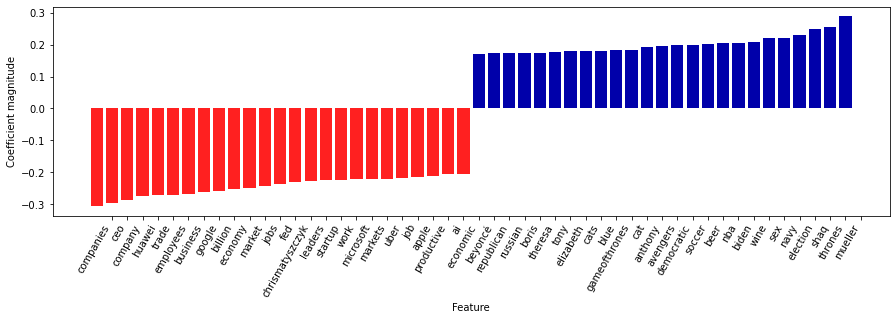

In [107]:
# Model coefficients

import mglearn

mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_,
                                     feature_names, n_top_features=25)

In [108]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())

param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
                  "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train_temp['text'], y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_)) 

print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.80
Best parameters:
{'logisticregression__C': 1, 'tfidfvectorizer__ngram_range': (1, 1)}


In [47]:
#!pip install -U pip setuptools wheel
#!pip install -U spacy
#!python -m spacy download en_core_web_sm

In [120]:
import re

import spacy

en_nlp = spacy.load('en_core_web_sm')
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# define a count vectorizer with the custom tokenizer
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [121]:
# transform text_train using CountVectorizer with lemmatization

X_train_lemma = lemma_vect.fit_transform(X_train_temp['text']) 

print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

# standard CountVectorizer for reference

vect = CountVectorizer(min_df=5).fit(X_train_temp['text']) 

X_train = vect.transform(X_train_temp['text']) 

print("X_train.shape: {}".format(X_train.shape))

X_train_lemma.shape: (21016, 5735)
X_train.shape: (21016, 6826)


In [122]:
# transform text_train using CountVectorizer with lemmatization

X_train_lemma = lemma_vect.fit_transform(X_train_temp['text']) 

print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5) 

grid.fit(X_train_lemma, y_train)

print("Best cross-validation score with lemma: {:.2f}".format(grid.best_score_))

print("Best parameters: ", grid.best_params_)

X_train_lemma.shape: (21016, 5735)
Best cross-validation score with lemma: 0.81
Best parameters:  {'C': 1}


In [123]:
X_test = lemma_vect.transform(X_test_temp['text']) 
y_pred = grid.predict(X_test)

In [124]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

actual = y_test.tolist()
results = confusion_matrix(actual, y_pred)


print('Confusion matrix :')
print(results)
print('Accuracy score :', accuracy_score(actual, y_pred))
print('Report : ')
print(classification_report(actual, y_pred))

f1 = f1_score(actual, y_pred, average='binary')
print('F1 measure: %.3f ', f1)


Confusion matrix :
[[4529  874]
 [ 874 2731]]
Accuracy score : 0.8059502664298401
Report : 
              precision    recall  f1-score   support

           1       0.84      0.84      0.84      5403
           2       0.76      0.76      0.76      3605

    accuracy                           0.81      9008
   macro avg       0.80      0.80      0.80      9008
weighted avg       0.81      0.81      0.81      9008

F1 measure: %.3f  0.8382380159170831
